# Section 12

### Geodemographic Segmentation

### VIF
- Can help us understand the multicolinearity of variables. We are not told which variables but it does provide insight on how correlated a variable is in a model
    - 1 = not correlated.
    - Between 1 and 5 = moderately correlated.
    - Greater than 5 = highly correlated.

In [5]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import BackwardElimination

PATH = '/Users/alexguanga/Downloads/'

In [ ]:
def vif(features):
    vif = pd.DataFrame()
    
    vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif["features"] = features.columns
    print(vif)

In [2]:
df_test = pd.read_csv(PATH+"Churn-Modelling-Test-Data.csv")
df_train = pd.read_csv(PATH+"Churn-Modelling.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
gender_dummy = pd.get_dummies(df_train['Gender'])
df_train = pd.concat([df_train, gender_dummy], axis=1)
df_train.drop(['Gender', 'Male'], axis=1, inplace=True) 

df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1


In [7]:
geo_dummy = pd.get_dummies(df_train['Geography'])
df_train = pd.concat([df_train, geo_dummy], axis=1)
df_train.drop(['Geography', 'France'], axis=1, inplace=True) 

df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1


In [8]:
features = df_train[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard',
                     'IsActiveMember','EstimatedSalary','Female','Germany','Spain']]

y = df_train['Exited']

In [9]:
model = BackwardElimination.CreateLogReg(features, y)
model.summary()

Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 14 Jan 2018   Pseudo R-squ.:                  0.1532
Time:                        09:30:43   Log-Likelihood:                -4280.7
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.9208      0.245    -15.980      0.000      -4.402      -3.440
CreditScore        -0.0007      0.000     -2.384      0.017      -0.001      -0.000
Age                 0.0727      0.003     28.230      0.000       0.068       0.078
Tenure             -0.0159      0.009     -1.705      0.088      -0.034       0.002
Balance          2.637e-06   5.14e-07      5.128      0.000    1.63e-06    3.64e-06
NumOfProducts      -0.1015      0.047     -2.154      0.031      -0.194      -0.009
HasCrCard          -0.0447      0.059     -0.753      0.452      -0.161       0.072
IsActiveMember     -1.0754      0.058    -18.643      0.000      -1.189      -0.962
EstimatedSalary  4.807e-07   4.74e-07      1.015      0.310   -4.48e-07    1.41e-06
Female              0.5285      0.054      9.699      0.000       0.422       0.635
Germany             0.7747      0.068     11.448      0.000       0.642       0.907
Spain               0.0352      0.071      0.499      0.618      -0.103       0.174
===================================================================================
"""

- Spain has the highest p-value!

In [12]:
stats_signf = 0.05
final_model, dict_AdjustR = BackwardElimination.BackwardElimination(features, y, stats_signf, 'Logistic')

final_model.summary()

Optimization terminated successfully.
         Current function value: 0.428307
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 14 Jan 2018   Pseudo R-squ.:                  0.1527
Time:                        09:31:23   Log-Likelihood:                -4283.1
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.9760      0.231    -17.200      0.000      -4.429      -3.523
CreditScore       -0.0007      0.000     -2.377      0.017      -0.001      -0.000
Age                0.0727      0.003     28.237      0.000       0.068       0.078
Balance         2.652e-06   5.14e-07      5.160      0.000    1.64e-06    3.66e-06
NumOfProducts     -0.1010      0.047     -2.144      0.032      -0.193      -0.009
IsActiveMember    -1.0718      0.058    -18.603      0.000      -1.185      -0.959
Female             0.5306      0.054      9.741      0.000       0.424       0.637
Germany            0.7608      0.063     12.014      0.000       0.637       0.885
==================================================================================
"""

In [13]:
VARS_FOR_MODELS = ['CreditScore','Age','Balance','NumOfProducts','IsActiveMember','Female','Germany']
features_2 = df_train[VARS_FOR_MODELS]

In [14]:
df_train['Log_Balance'] = np.log(df_train['Balance'] + 1)
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Germany,Spain,Log_Balance
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0.000000
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,11.336294
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,11.980813
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0.000000
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,11.740155


In [15]:
# Replacing log for balance instead

features_2 = pd.concat([features_2,df_train['Log_Balance']], axis=1)
features_2.drop('Balance',axis=1, inplace=True)

features_2.head()

,CreditScore,Age,NumOfProducts,IsActiveMember,Female,Germany,Log_Balance
0,619,42,1,1,1,0,0.000000
1,608,41,1,1,1,0,11.336294
2,502,42,3,0,1,0,11.980813
3,699,39,2,0,1,0,0.000000
4,850,43,1,1,1,0,11.740155


In [36]:
model_2 = BackwardElimination.CreateLogReg(features_2, y)
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.428401
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 14 Jan 2018   Pseudo R-squ.:                  0.1525
Time:                        09:49:20   Log-Likelihood:                -4284.0
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.9924      0.233    -17.163      0.000      -4.448      -3.536
CreditScore       -0.0007      0.000     -2.407      0.016      -0.001      -0.000
Age                0.0726      0.003     28.220      0.000       0.068       0.078
NumOfProducts     -0.0955      0.048     -2.010      0.044      -0.189      -0.002
IsActiveMember    -1.0725      0.058    -18.621      0.000      -1.185      -0.960
Female             0.5283      0.054      9.704      0.000       0.422       0.635
Germany            0.7463      0.065     11.475      0.000       0.619       0.874
Log_Balance        0.0300      0.006      4.947      0.000       0.018       0.042
==================================================================================
"""

In [42]:
vif(features_2)

   VIF Factor        features
0   18.213836     CreditScore
1   12.147749             Age
2    7.795316   NumOfProducts
3    2.074164  IsActiveMember
4    1.822808          Female
5    1.684154         Germany
6    3.660435     Log_Balance


In [41]:
df_train['Wealth_Accumulation'] = df_train.Balance/df_train.Age

# Adding a new variable that can help us look at the information
# from the balance people make at a certain age
features_3 = pd.concat([features_2,df_train['Wealth_Accumulation']], axis=1)

model_3 = BackwardElimination.CreateLogReg(features_3, y)
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.428336
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sun, 14 Jan 2018   Pseudo R-squ.:                  0.1526
Time:                        09:50:44   Log-Likelihood:                -4283.4
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9082      0.244    -16.031      0.000      -4.386      -3.430
CreditScore            -0.0007      0.000     -2.409      0.016      -0.001      -0.000
Age                     0.0707      0.003     22.839      0.000       0.065       0.077
NumOfProducts          -0.0960      0.048     -2.020      0.043      -0.189      -0.003
IsActiveMember         -1.0702      0.058    -18.571      0.000      -1.183      -0.957
Female                  0.5273      0.054      9.683      0.000       0.421       0.634
Germany                 0.7450      0.065     11.441      0.000       0.617       0.873
Log_Balance             0.0412      0.012      3.567      0.000       0.019       0.064
Wealth_Accumulation -4.308e-05   3.78e-05     -1.140      0.254      -0.000     3.1e-05
=======================================================================================
"""

In [40]:
vif(features_3)

   VIF Factor             features
0   20.258148          CreditScore
1   16.131446                  Age
2    7.878552        NumOfProducts
3    2.077322       IsActiveMember
4    1.823037               Female
5    1.689429              Germany
6   15.976575          Log_Balance
7   12.090986  Wealth_Accumulation


In [43]:
features_4 = features_2.drop('Log_Balance', axis=1)

model_3 = BackwardElimination.CreateLogReg(features_4, y)
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.429635
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sun, 14 Jan 2018   Pseudo R-squ.:                  0.1501
Time:                        09:51:37   Log-Likelihood:                -4296.3
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.6860      0.224    -16.487      0.000      -4.124      -3.248
CreditScore       -0.0007      0.000     -2.390      0.017      -0.001      -0.000
Age                0.0724      0.003     28.196      0.000       0.067       0.077
NumOfProducts     -0.1672      0.046     -3.665      0.000      -0.257      -0.078
IsActiveMember    -1.0693      0.058    -18.585      0.000      -1.182      -0.957
Female             0.5225      0.054      9.614      0.000       0.416       0.629
Germany            0.9034      0.058     15.706      0.000       0.791       1.016
==================================================================================
"""

In [44]:
vif(features_4)

   VIF Factor        features
0   15.972169     CreditScore
1   11.930786             Age
2    7.124511   NumOfProducts
3    2.072956  IsActiveMember
4    1.822516          Female
5    1.336626         Germany


In [45]:
features_5 = features_4.drop('Age',axis=1)
vif(features_5)

   VIF Factor        features
0    8.555489     CreditScore
1    6.999989   NumOfProducts
2    2.037379  IsActiveMember
3    1.811533          Female
4    1.328667         Germany


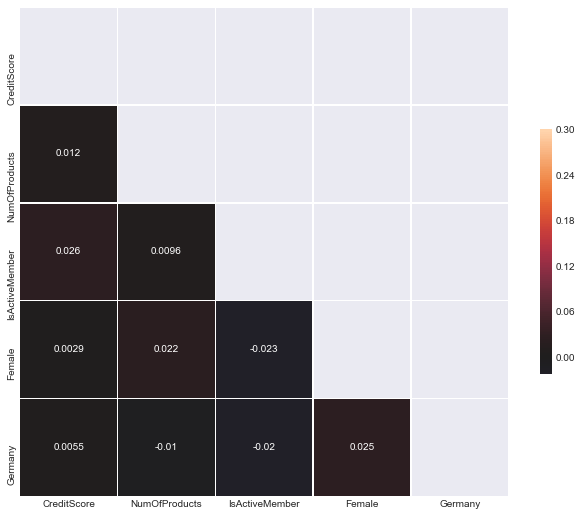

In [46]:
# Compute the correlation matrix
corr = features_5.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [47]:
## FINAL MODEL
# Might add tenure?

features_2.columns

Index(['CreditScore', 'Age', 'NumOfProducts', 'IsActiveMember', 'Female',
       'Germany', 'Log_Balance'],
      dtype='object')